In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from datetime import datetime
import matplotlib

from write_read_cache import store_data, read_data

cache_folder = "cache/PT_100/"

![pt100_up](images\PastedGraphic-4.png)
![pt100_down](images\PastedGraphic-5.png)

In [21]:
# Import data from PT_100

pt100_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\PT100_temperatures.txt"
pt100_data_raw = pd.read_csv(pt100_filepath, sep="\t")

# Convert date and time into usable format
for i in range(0, len(pt100_data_raw)):
    datetime_str = pt100_data_raw.loc[i, "datetime"]
    datetime_val = datetime.strptime(datetime_str, "%d/%m/%y %H:%M:%S")
    pt100_data_raw.loc[i, "datetime"] = datetime_val

store_data(pt100_data_raw, "pt100_data_raw", cache_folder)
print(pt100_data_raw)


                  datetime   SS3B   SS3C   SS3D   SS3E   SS2D   SS2E   SS2F  \
0      2023-02-16 12:34:06  22.69  22.25  22.44  22.31  22.56  22.56  22.25   
1      2023-02-16 12:34:16  22.75  22.31  22.50  22.38  22.63  22.69  22.31   
2      2023-02-16 12:34:26  22.81  22.44  22.56  22.38  22.69  22.69  22.38   
3      2023-02-16 12:34:36  22.81  22.44  22.56  22.44  22.69  22.75  22.38   
4      2023-02-16 12:34:46  22.81  22.44  22.56  22.44  22.75  22.75  22.44   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
53365  2023-02-22 16:48:16  24.13  23.75  23.94  23.75  22.69  24.13  23.69   
53366  2023-02-22 16:48:26  24.25  23.81  23.94  23.81  22.69  24.19  23.69   
53367  2023-02-22 16:48:36  24.19  23.81  24.00  23.81  22.69  24.13  23.75   
53368  2023-02-22 16:48:46  24.25  23.81  23.94  23.75  22.69  24.13  23.75   
53369  2023-02-22 16:48:56  24.19  23.81  23.94  23.75  22.31  24.13  23.69   

        SS3A   SS6C   SS5D   SS6A   CC2C   CC2D   C

4.182460183623759


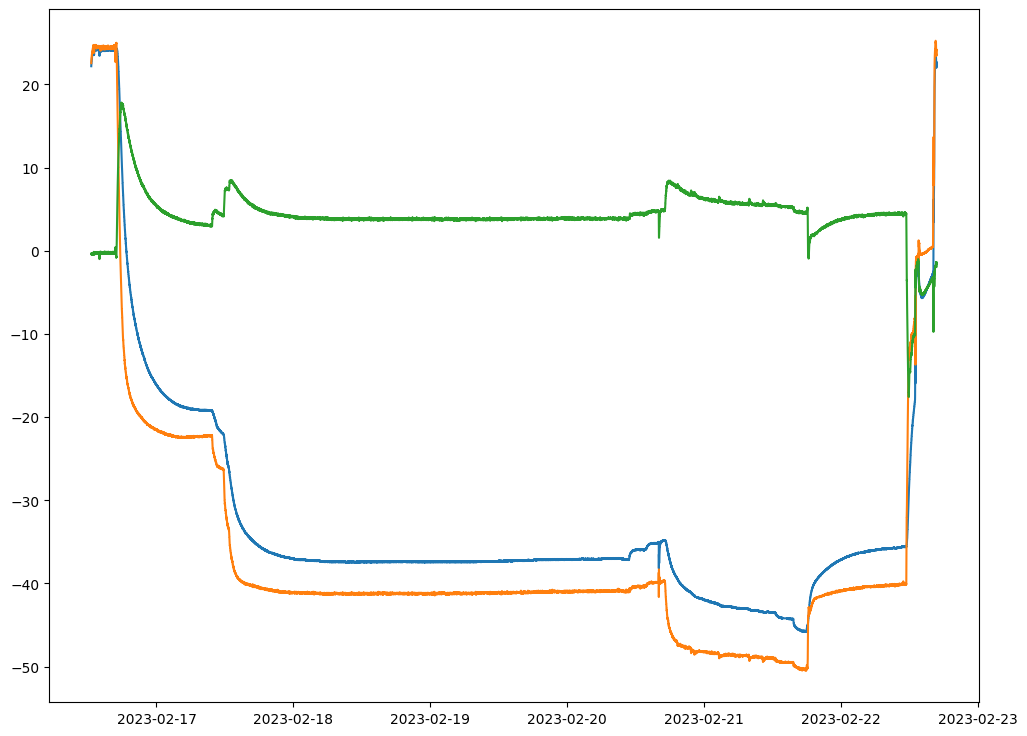

In [28]:
# Plot data for all sensors
pt100_data = read_data("pt100_data_raw", cache_folder)

matplotlib.rcParams["figure.figsize"] = [8 * 1.5, 6 * 1.5]

plt.clf()
plt.plot(pt100_data["datetime"], pt100_data["CC2D"])
plt.plot(pt100_data["datetime"], pt100_data["SS2E"])
plt.plot(pt100_data["datetime"], pt100_data["CC2D"] - pt100_data["SS2E"])


In [55]:
# Plot data for all sensors
pt100_data = read_data("pt100_data_raw", cache_folder)
sensor_list = pt100_data.columns.to_list()[1:-2]
print(sensor_list)

delta_values = pd.DataFrame(columns=["s1", "s2", "mean_delta", "max_delta", "datetime_max_delta"])

for s1 in sensor_list:
    for s2 in sensor_list:
        delta = pt100_data[s1]["delta"] - pt100_data[s2]["delta"]
        row_to_append = pd.DataFrame({"s1": [s1], "s2": [s2], "mean_delta": [np.mean(delta.to_numpy())], "max_delta": [np.max(delta.to_numpy())]})
        delta_values = pd.concat([delta_values, row_to_append])

print(delta_values)
# print(np.max(delta_values["delta"].to_numpy()))


['SS3B', 'SS3C', 'SS3D', 'SS3E', 'SS2D', 'SS2E', 'SS2F', 'SS3A', 'SS6C', 'SS5D', 'SS6A', 'CC2C', 'CC2D', 'CC3A', 'CC3B']


KeyError: 'delta'